In [7]:
# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
import os

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import optimizers

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
train_images.shape


(60000, 28, 28)

In [11]:
len(train_labels)

60000

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

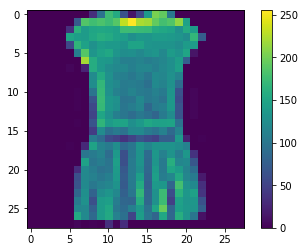

In [14]:
# Check the scale of one of the training images
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)

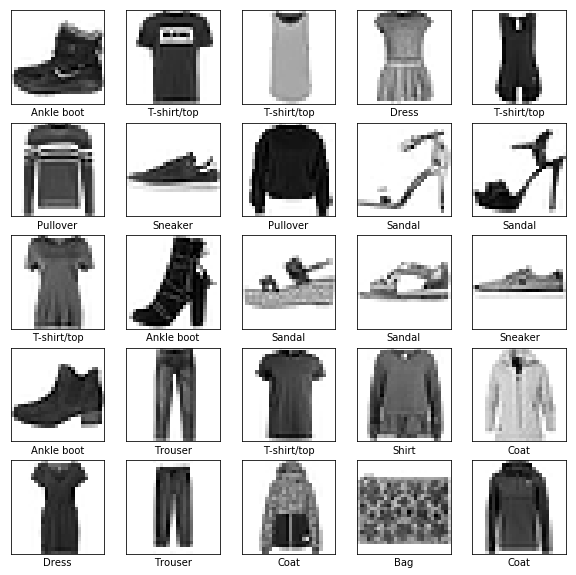

In [15]:
# Scale the images so that the pixel values fall between 0 to 1
train_images = train_images / 255.0

test_images = test_images / 255.0

trainImagesArray = train_images
testImagesArray = test_images

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [16]:
#Reshaping
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [17]:
# Build a Convolutional Neural Network
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for the training images and training labels
model.fit(train_images, train_labels,
          batch_size=200,
          epochs=5,
          verbose=1,
          validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 607s 10ms/step - loss: 0.5443 - acc: 0.8020 - val_loss: 0.4126 - val_acc: 0.8509
Epoch 2/5
60000/60000 [==============================] - 581s 10ms/step - loss: 0.3353 - acc: 0.8790 - val_loss: 0.3205 - val_acc: 0.8844
Epoch 3/5
60000/60000 [==============================] - 614s 10ms/step - loss: 0.2887 - acc: 0.8935 - val_loss: 0.3021 - val_acc: 0.8916
Epoch 4/5
60000/60000 [==============================] - 647s 11ms/step - loss: 0.2525 - acc: 0.9085 - val_loss: 0.2876 - val_acc: 0.8952
Epoch 5/5
60000/60000 [==============================] - 642s 11ms/step - loss: 0.2311 - acc: 0.9152 - val_loss: 0.2658 - val_acc: 0.9033


In [19]:
# Test the accuracy by evaluating the model for test images and test labels
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 30s 3ms/step
Test accuracy: 0.9033


In [20]:
# Predict the class associated with every test image 
predictions = model.predict(test_images)
print (len(predictions))

10000


In [21]:
np.argmax(predictions[17])

4

In [22]:
print(predictions[0])

[1.43719571e-05 1.12108856e-08 1.25498801e-07 4.81569664e-08
 3.40927606e-08 8.95867823e-04 8.51690174e-07 4.63603390e-03
 2.27606552e-06 9.94450450e-01]


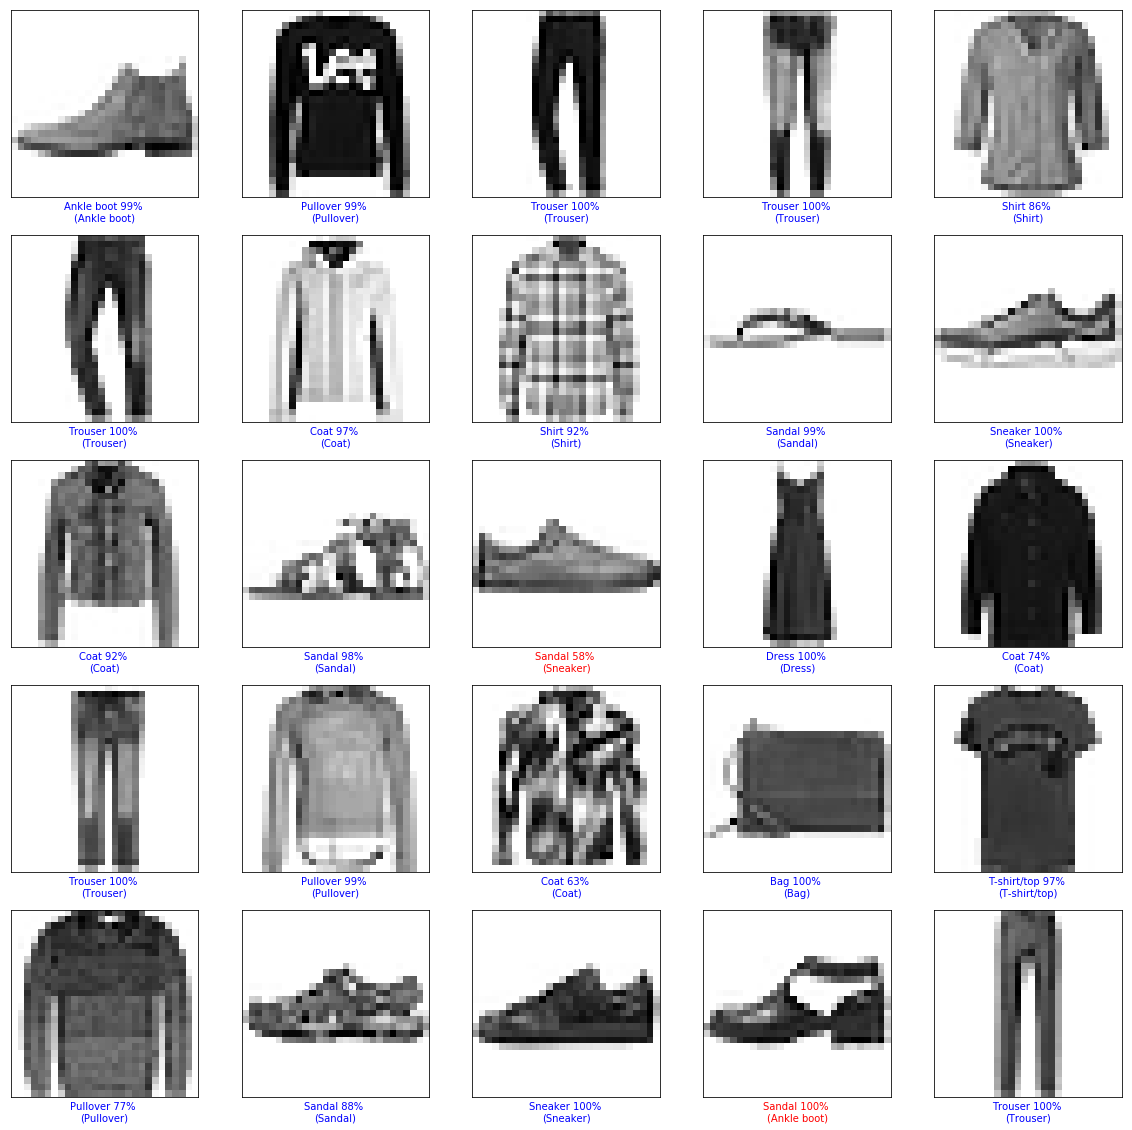

In [26]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% \n({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


# Plot predictiond for first 25 clothing test data
plt.figure(figsize=(20,20))
for i in range(0, 25):
    plt.subplot(5,5,i+1)
    plot_image(i, predictions, test_labels, testImagesArray)